<a href="https://colab.research.google.com/github/JaganFoundr/Generative_Adverserial_NN/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#1 importing important libraries
import torch
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as tt
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader

In [57]:
#2 downloading the training datasets
dataset=MNIST(root='./data', download=True, train=True,transform=tt.Compose([tt.ToTensor(),
                                                                             tt.Normalize(mean=(0.5,),std=(0.5,))
                                                                             ]) )

images:  tensor([[[ 0.9843,  0.9843, -0.1059, -0.9765, -1.0000],
         [ 0.9843,  0.6706, -0.8510, -1.0000, -1.0000],
         [ 0.9922,  0.3255, -1.0000, -1.0000, -1.0000],
         [ 0.9843, -0.2157, -1.0000, -1.0000, -1.0000],
         [ 0.6314, -0.8588, -1.0000, -1.0000, -0.2706]]])
label is:  6
torch min:  tensor(0.9922) torch max:  tensor(-1.)


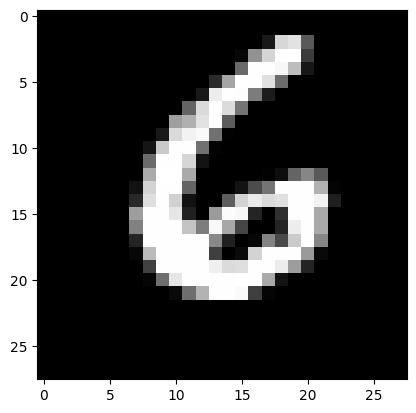

labels:  6


In [58]:
#3 plotting the images just for a check
images, labels = dataset[90]
print("images: ",images[:,10:15,10:15])
print("label is: ",labels)

# displaying the min and max values of images
print("torch min: ",torch.max(images),"torch max: ", torch.min(images))

#denormalising image data which was normalised before ,for better visual treatment
def denorm(x):
  out = (x+1)/2
  return out.clamp(0,1)

#displaying the images after denormalizing which had been normalized in the second step
images=denorm(images)
plt.imshow(images[0], cmap='gray')
plt.show()
print("labels: ", labels)

images shape:  torch.Size([1, 28, 28])
label batch:  tensor([3, 2, 1, 4, 9, 3, 1, 8, 7, 0, 0, 4, 3, 6, 4, 8, 8, 3, 3, 8, 9, 3, 4, 3,
        1, 8, 0, 4, 2, 3, 8, 7, 6, 1, 9, 4, 5, 7, 8, 8, 0, 8, 2, 4, 3, 2, 6, 1,
        0, 1, 6, 5, 8, 4, 3, 0, 0, 8, 4, 6, 5, 7, 3, 9, 0, 5, 4, 2, 9, 4, 8, 2,
        8, 1, 0, 7, 0, 1, 2, 3, 4, 3, 4, 9, 2, 7, 1, 9, 5, 6, 8, 9, 2, 3, 5, 5,
        4, 8, 4, 3])


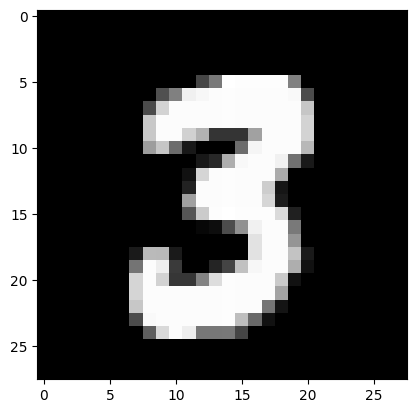

In [59]:
#4 defining the batch size and putting the dataset inside the loader
batch_size=100
trainloader = DataLoader(dataset, batch_size, shuffle=True)

# putting the training loader inside the for loop just for checking the predictions.
for images_batch, labels_batch in trainloader:
  pass

# defining the images shape and plotting the predicted images batch and displaying the labels of batch inside the loader
print("images shape: ",images.shape)
plt.imshow(images_batch[0][0], cmap='gray')
print("label batch: ",labels_batch)

In [60]:
#5
#defining the discriminator model
image_size=784   #input size
hidden_size=256  #hidden size

discriminator=nn.Sequential(          #feed forward nn
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),                #leaky relu is slightly different from relu, which multiplies the value passed as an argument when x is negative
                                      #where the relu gives 0 values to the gradient , and leaky relu leaks some negatives values to the gradient , not only 0s
                                      #in order for the model to learn and complex patterns
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),

    nn.Linear(hidden_size, 1),
    nn.Sigmoid()                      # sigmoid activation function is used to predict probablities between 0 and 1.
)

In [61]:
discriminator

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): LeakyReLU(negative_slope=0.2)
  (4): Linear(in_features=256, out_features=1, bias=True)
  (5): Sigmoid()
)

In [62]:
#6
#defining the generator model
latent_size=64    # this is the input to the generator model which acts as a seed to this model to predict complex patterns and outputs
                  # provides the generator with more information
generator=nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),    #relu gives good result in generator and leaky relu gives good results in discriminator.

    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, image_size),
    nn.Tanh()     #hyperbolic tangent function from -1 to 1

)

In [63]:
generator

Sequential(
  (0): Linear(in_features=64, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=784, bias=True)
  (5): Tanh()
)

In [64]:
#7 generating fake images by giving random inputs
prediction = generator(torch.randn(2,latent_size))

#displaying the prediction values and its shape
print("prediction is: ", prediction)
print("prediction shape: ",prediction.shape)

prediction is:  tensor([[ 0.1576,  0.2020,  0.1597,  ..., -0.1518,  0.1123, -0.2481],
        [ 0.0921, -0.0021, -0.0130,  ..., -0.1644,  0.0056, -0.1042]],
       grad_fn=<TanhBackward0>)
prediction shape:  torch.Size([2, 784])


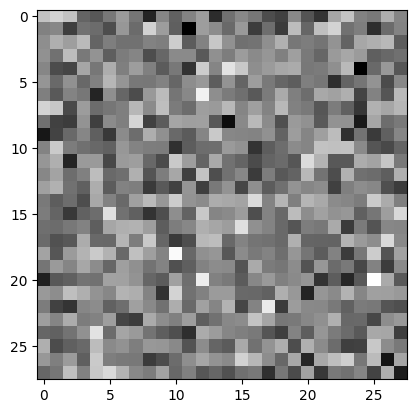

In [65]:
#8 reshape the picture back to its size, denormalize the fake picture generated and then plot the images
generated=denorm(prediction.reshape(-1,28,28)).detach()         # detach will detach that images tensors from the attached graph

#plotting the first image
plt.imshow(generated[0],cmap='gray')

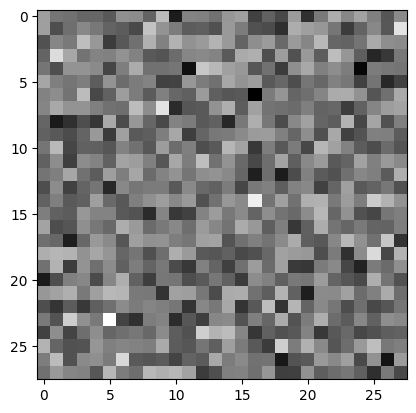

In [66]:
#plotting the second image
plt.imshow(generated[1],cmap='gray')

In [67]:
#9 defining the loss function, as it is a binary classification model, we can use binary cross entropy loss.
loss_fn=nn.BCELoss()

In [68]:
#10 defining the discriminator and generator optimizer
disc_opt=torch.optim.Adam(discriminator.parameters(), lr=0.0002)
gener_opt=torch.optim.Adam(generator.parameters(), lr=0.0002)

In [69]:
#11 creating a reset grad function to reset the gradients of both discriminator and generator
def reset_grad():
  discriminator.zero_grad()
  generator.zero_grad()

In [70]:
#12 discriminator training function
def discriminator_training(images):

  #creating the labels for real and fake images
  real_label = torch.ones(batch_size,1)      #real as 1
  fake_label = torch.zeros(batch_size,1)     #fake as 0

  #real image loss
  discriminator_output = discriminator(images)                            #predicting the images using discriminator
  discriminator_real_loss = loss_fn(discriminator_output, real_label)     #computing the loss
  real_score = discriminator_output                                       #just defining the real image score inside a variable

  #fake image loss
  images = torch.randn(batch_size, latent_size)                           #random input size or input vector for the generator to generate fake images
  fake_images = generator(images)                                         #generating fake images
  discriminator_output = discriminator(fake_images)                       #predicting that images using the discriminator
  discriminator_fake_loss = loss_fn(discriminator_output, fake_label)     #computing the loss
  fake_score = discriminator_output                                       #just defining the fake image score inside a variable

  #combine both the losses
  total_d_loss = discriminator_real_loss+discriminator_fake_loss          #add both the losses as a single loss

  #reset all the gradients
  reset_grad()

  #compute the gradients
  total_d_loss.backward()

  #update the weights
  disc_opt.step()

  return total_d_loss, real_score, fake_score

In [71]:
#13 generator training function by fooling the discriminator model
def generator_training():

  #create fake images and calculate the gen loss
  images = torch.randn(batch_size,latent_size)              #random input size or input vector for the generator to generate fake images
  fake_images = generator(images)                           #generating fake images
  labels = torch.ones(batch_size,1)                         #trick to fool the discriminator think that the predicted labels are close to one, to make the generator better.
  gen_loss = loss_fn(discriminator(fake_images),labels)     #computing the generator loss

  #backpropogation
  reset_grad()
  gen_loss.backward()
  gener_opt.step()

  return gen_loss, fake_images

In [72]:
#14 training the model and inspecting the results while training
import os

dir='sample'
if not os.path.exists(dir):
  os.makedirs(dir)

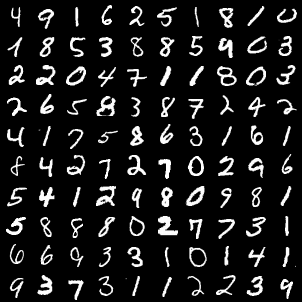

In [73]:
# lets save some real mnist images and put inside the directory
from IPython.display import Image
from torchvision.utils import save_image

for images,_ in trainloader:
  images=images.reshape(images.size(0),1,28,28)
  save_image(denorm(images),os.path.join(dir, 'sample_real_image.png'),nrow=10)
  break

Image(os.path.join(dir, 'sample_real_image.png'))

Saving....... fake_images-0000.png


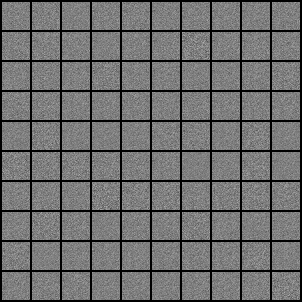

In [74]:
from torchvision.utils import save_image

# 15 Create a random vector (latent space vector) for generating images
sample_vector = torch.randn(batch_size, latent_size)

def save_fake_images(index):
    fake_images = generator(sample_vector)  # Generate fake images using the generator
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)  # Reshape for saving

    # Zero-padded filenames for proper sorting
    fake_fname = f'fake_images-{index:04d}.png'  # Zero-padding to 4 digits

    print(f"Saving....... {fake_fname}")
    save_image(denorm(fake_images), os.path.join(dir, fake_fname), nrow=10)

# Save one image before training to check
save_fake_images(0)
Image(os.path.join(dir, 'fake_images-0000.png'))  # Display the saved image


In [75]:
nepochs=200
# Initialize lists to store losses and scores (these should have one value per epoch)
d_losses, g_losses, real_scores, fake_scores = [], [], [], []

# Assuming you have a main loop like this where you accumulate the losses per epoch:
for epoch in range(nepochs):
    epoch_d_loss = 0
    epoch_g_loss = 0
    epoch_real_score = 0
    epoch_fake_score = 0
    num_batches = 0

    # Inner training loop for the current epoch
    for images, _ in trainloader:
        images = images.reshape(batch_size, -1)  # Reshaping the batch of images

        # Train the discriminator
        total_d_loss, real_score, fake_score = discriminator_training(images)

        # Train the generator
        gen_losses, fake_images = generator_training()

        # Accumulate the losses and scores for averaging
        epoch_d_loss += total_d_loss.item()
        epoch_g_loss += gen_losses.item()
        epoch_real_score += real_score.mean().item()
        epoch_fake_score += fake_score.mean().item()

        num_batches += 1

    # Average the losses and scores for the current epoch
    d_losses.append(epoch_d_loss / num_batches)
    g_losses.append(epoch_g_loss / num_batches)
    real_scores.append(epoch_real_score / num_batches)
    fake_scores.append(epoch_fake_score / num_batches)

    # Print epoch stats
    print(f"Epoch {epoch+1}/{nepochs}:")
    print("---------------------------")
    print(f"Discriminator loss: {d_losses[-1]:.4f}")
    print(f"Generator loss: {g_losses[-1]:.4f}")
    print("---------------------------")
    print(f"Real score: {real_scores[-1]:.2f}")
    print(f"Fake score: {fake_scores[-1]:.2f}")
    save_fake_images(epoch+1)
    print("################################\n")

Epoch 1/200:
---------------------------
Discriminator loss: 0.2479
Generator loss: 3.9093
---------------------------
Real score: 0.94
Fake score: 0.14
Saving....... fake_images-0001.png
################################

Epoch 2/200:
---------------------------
Discriminator loss: 0.2077
Generator loss: 4.7136
---------------------------
Real score: 0.94
Fake score: 0.08
Saving....... fake_images-0002.png
################################

Epoch 3/200:
---------------------------
Discriminator loss: 0.4391
Generator loss: 3.8544
---------------------------
Real score: 0.88
Fake score: 0.14
Saving....... fake_images-0003.png
################################

Epoch 4/200:
---------------------------
Discriminator loss: 0.4453
Generator loss: 3.1069
---------------------------
Real score: 0.87
Fake score: 0.15
Saving....... fake_images-0004.png
################################

Epoch 5/200:
---------------------------
Discriminator loss: 0.1775
Generator loss: 4.1392
---------------------

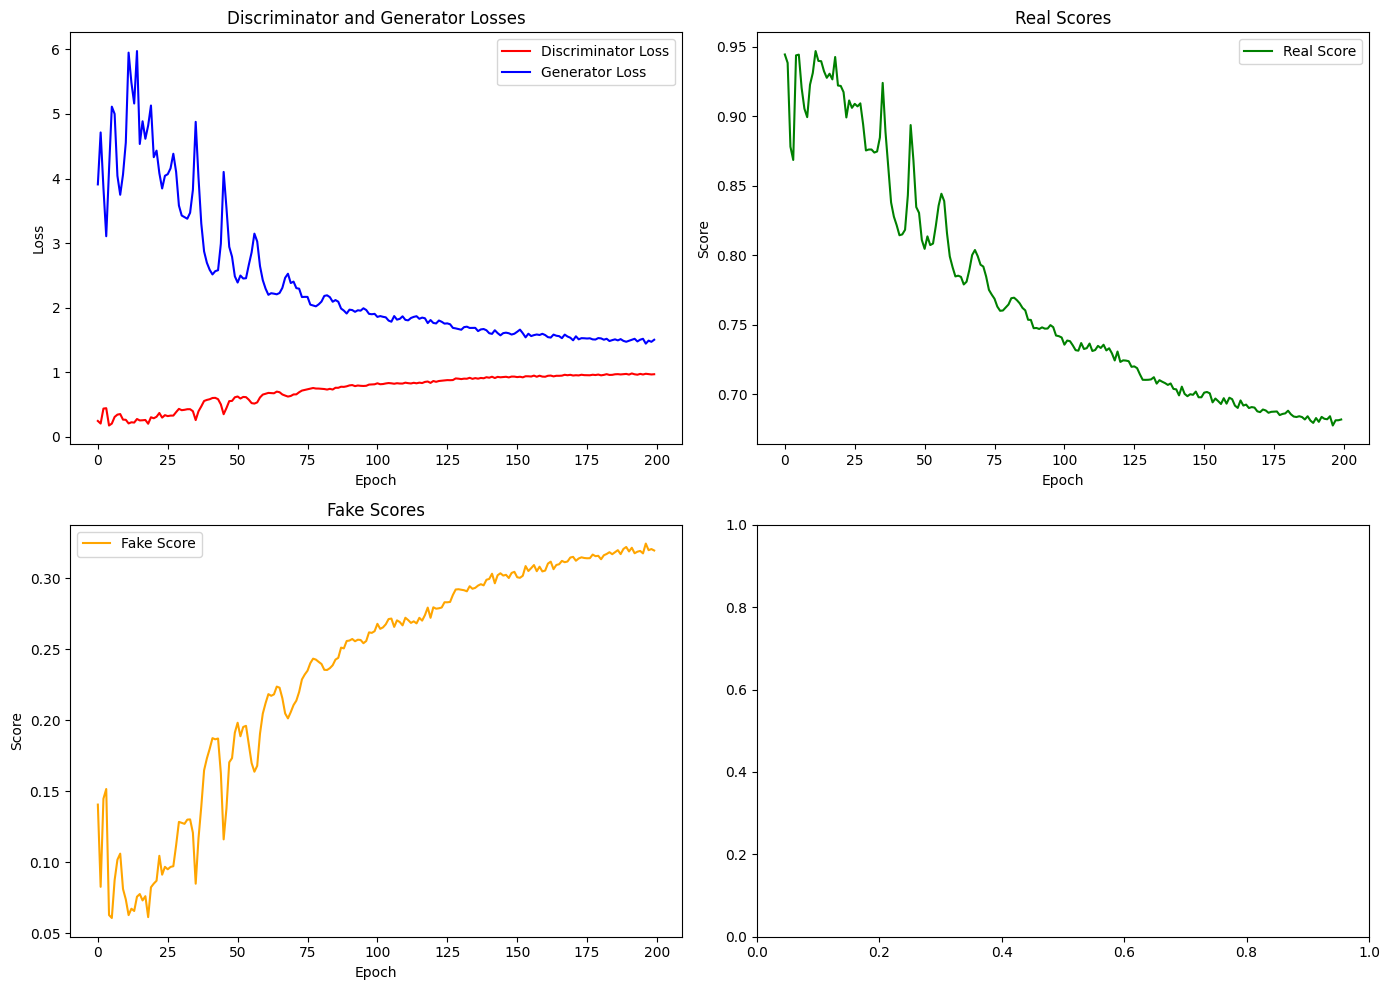

In [76]:
# 17 plotting the performance
import matplotlib.pyplot as plt

# Plot the losses and scores after all epochs
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Plot Discriminator and Generator losses
ax[0, 0].plot(range(nepochs), d_losses, label='Discriminator Loss', color='red')
ax[0, 0].plot(range(nepochs), g_losses, label='Generator Loss', color='blue')
ax[0, 0].set_title('Discriminator and Generator Losses')
ax[0, 0].set_xlabel('Epoch')
ax[0, 0].set_ylabel('Loss')
ax[0, 0].legend()

# Plot Real Scores
ax[0, 1].plot(range(nepochs), real_scores, label='Real Score', color='green')
ax[0, 1].set_title('Real Scores')
ax[0, 1].set_xlabel('Epoch')
ax[0, 1].set_ylabel('Score')
ax[0, 1].legend()

# Plot Fake Scores
ax[1, 0].plot(range(nepochs), fake_scores, label='Fake Score', color='orange')
ax[1, 0].set_title('Fake Scores')
ax[1, 0].set_xlabel('Epoch')
ax[1, 0].set_ylabel('Score')
ax[1, 0].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [77]:
#18 save the model
torch.save(generator.state_dict(),'generator.ckpt')
torch.save(discriminator.state_dict(),'discriminator.ckpt')

In [78]:
#19 creating a video of the process
import cv2
from IPython.display import FileLink

# Set the output video name
vid_name = "generative_adversarial_NN.avi"

# Gather all files with 'fake_images' in their names
files = [os.path.join(dir, f) for f in os.listdir(dir) if 'fake_images' in f]

# Sort files numerically based on the padded filenames
files.sort()  # Sorting lexicographically should work because of zero-padding

# Create a VideoWriter object with the appropriate frame size and codec
out = cv2.VideoWriter(vid_name, cv2.VideoWriter_fourcc(*'MP4V'), 8, (302, 302))

# Write each image as a frame to the video
for fname in files:
    img = cv2.imread(fname)  # Read the image
    out.write(img)  # Write the image to the video

# Release the video writer after writing all frames
out.release()

# Provide a link to download the generated video
FileLink(vid_name)


/content/generative_adversarial_NN.avi